# 5. scATAC profiles of fetal tissues from the fetal cell atlas dataset
Domcke S, Hill AJ, Daza RM, Cao J, O’Day DR, Pliner HA, et al. A human cell atlas of fetal chromatin accessibility. Science. 2020;370:eaba7612

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

#Setup path to R for propeller
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
fetal_scatac_counts = pd.read_csv("data/scATAC_counts.tsv", sep='\t')

In [4]:
fetal_scatac = convert_counts_to_df(fetal_scatac_counts, column_name="cell_type")

In [5]:
fetal_scatac.head()

,Sample,Sex,Tissue,Batch,Donor_id,cell_type
cell_1,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_2,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_3,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_4,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_5,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells


------------

## Run Scanpro

### With replicates

In [6]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                                   conds_col='Tissue', samples_col='Sample')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [7]:
scanpro_out.results

,baseline_props,mean_props_Adrenal,mean_props_Brain,mean_props_Heart,mean_props_Intestine,mean_props_Stomach,mean_props_Placenta,mean_props_Liver,mean_props_Eye,mean_props_Lung,mean_props_Kidney,mean_props_Muscle,mean_props_Thymus,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,,,,,,,,,,
Adrenocortical cells,0.084436,0.814156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.462313,0.0,0.0
Astrocytes,0.012881,0.000000,0.111011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.888388,0.0,0.0
Cardiomyocytes,0.069971,0.000000,0.000000,0.662907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.733757,0.0,0.0
Chromaffin cells,0.007953,0.065029,0.000000,0.000000,0.019419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.807909,0.0,0.0
Epithelial cells,0.000885,0.000000,0.000000,0.000000,0.000000,0.204832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.750816,0.0,0.0
Erythroblasts,0.212123,0.007910,0.000000,0.023151,0.000000,0.000000,0.023324,0.689365,0.000000,0.000000,0.000000,0.000000,0.000000,163.148151,0.0,0.0
Excitatory neurons,0.075686,0.000000,0.698202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.511930,0.0,0.0
Ganglion cells,0.001483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205163,0.000000,0.000000,0.000000,0.000000,40.975460,0.0,0.0
Goblet cells,0.001867,0.000000,0.000000,0.000000,0.000000,0.420814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.417602,0.0,0.0


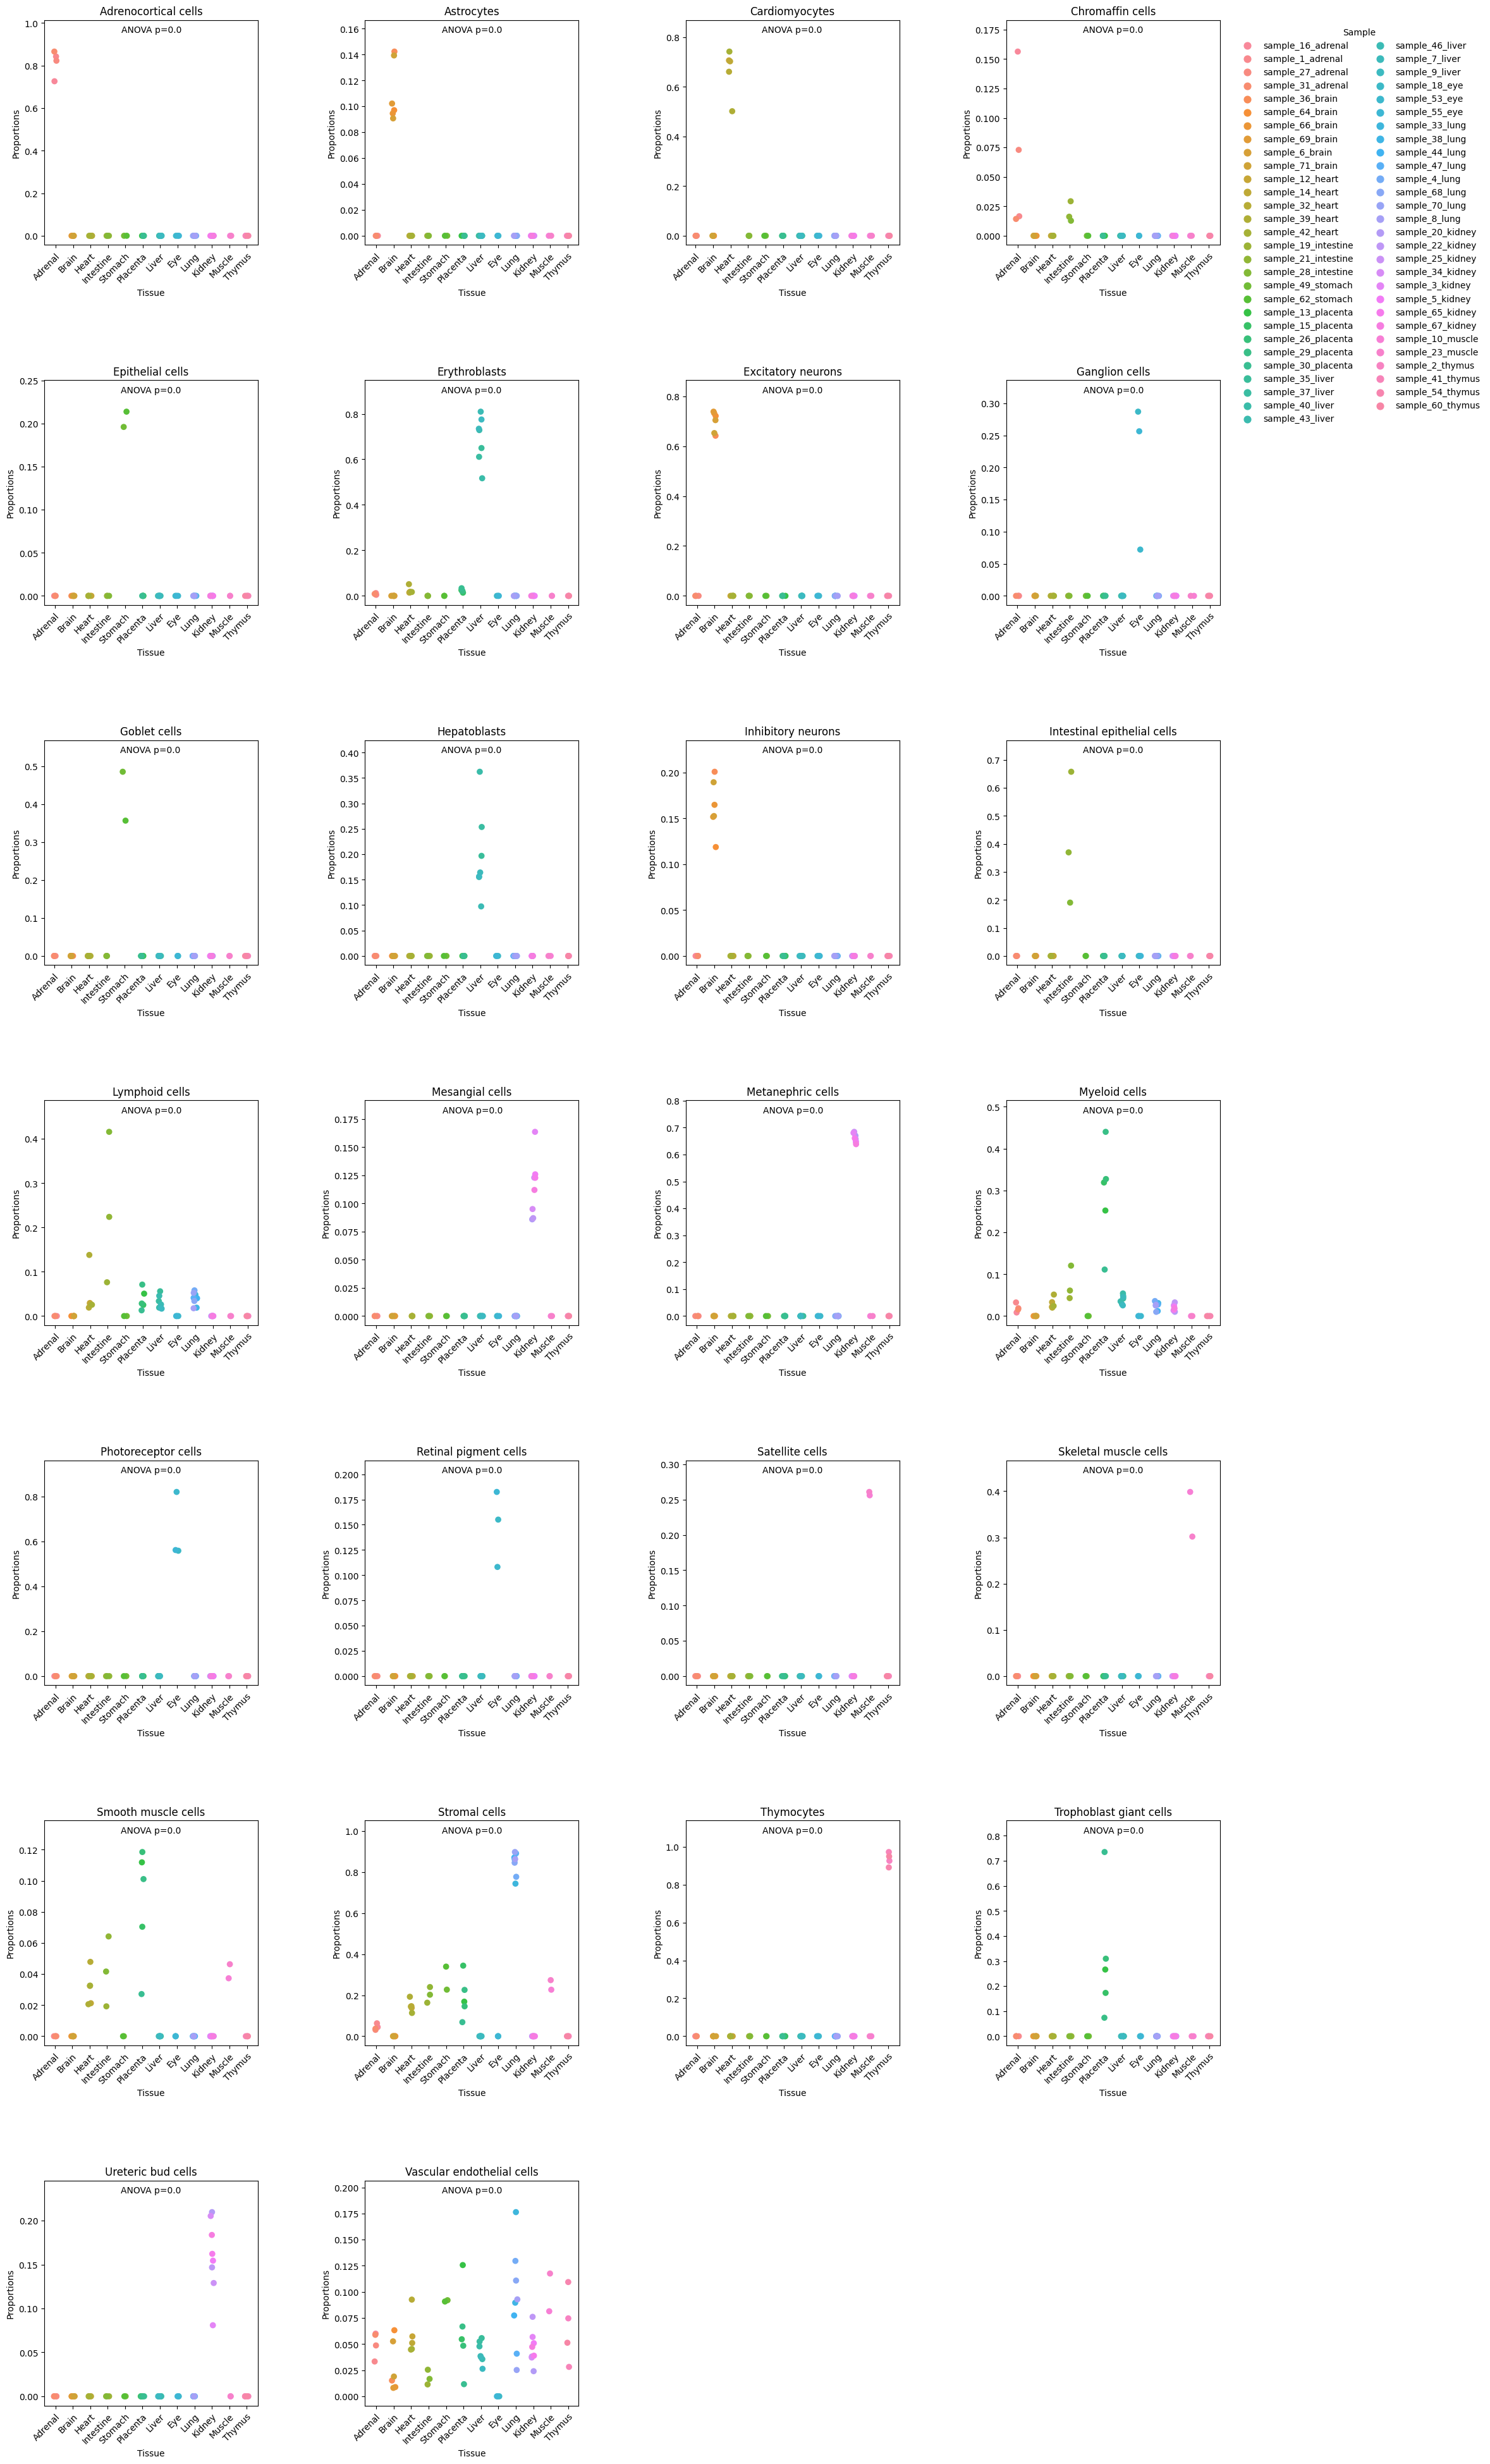

In [8]:
scanpro_out.plot(n_columns=4, save=f"{FIG_PATH}/scatac_rep_all.pdf")

In [9]:
scanpro_out.results.to_csv("results/scatac_scanpro_rep.tsv", sep="\t")

### Without replicates

In [10]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                                    conds_col='Tissue')
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 85.76 seconds


,baseline_props,mean_props_Adrenal,mean_props_Brain,mean_props_Heart,mean_props_Intestine,mean_props_Stomach,mean_props_Placenta,mean_props_Liver,mean_props_Eye,mean_props_Lung,mean_props_Kidney,mean_props_Muscle,mean_props_Thymus,p_values
clusters,,,,,,,,,,,,,,
Adrenocortical cells,0.084436,0.825272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Astrocytes,0.012881,0.000000,0.114083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.107789e-10
Cardiomyocytes,0.069971,0.000000,0.000000,0.617677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Chromaffin cells,0.007953,0.063283,0.000000,0.000000,0.015716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.465116e-10
Epithelial cells,0.000885,0.000000,0.000000,0.000000,0.000000,0.196689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.085261e-11
Erythroblasts,0.212123,0.004168,0.000000,0.026412,0.000000,0.000000,0.017098,0.670879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Excitatory neurons,0.075686,0.000000,0.685454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Ganglion cells,0.001483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253235,0.000000,0.000000,0.000000,0.000000,2.851941e-13
Goblet cells,0.001867,0.000000,0.000000,0.000000,0.000000,0.428127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.804112e-16


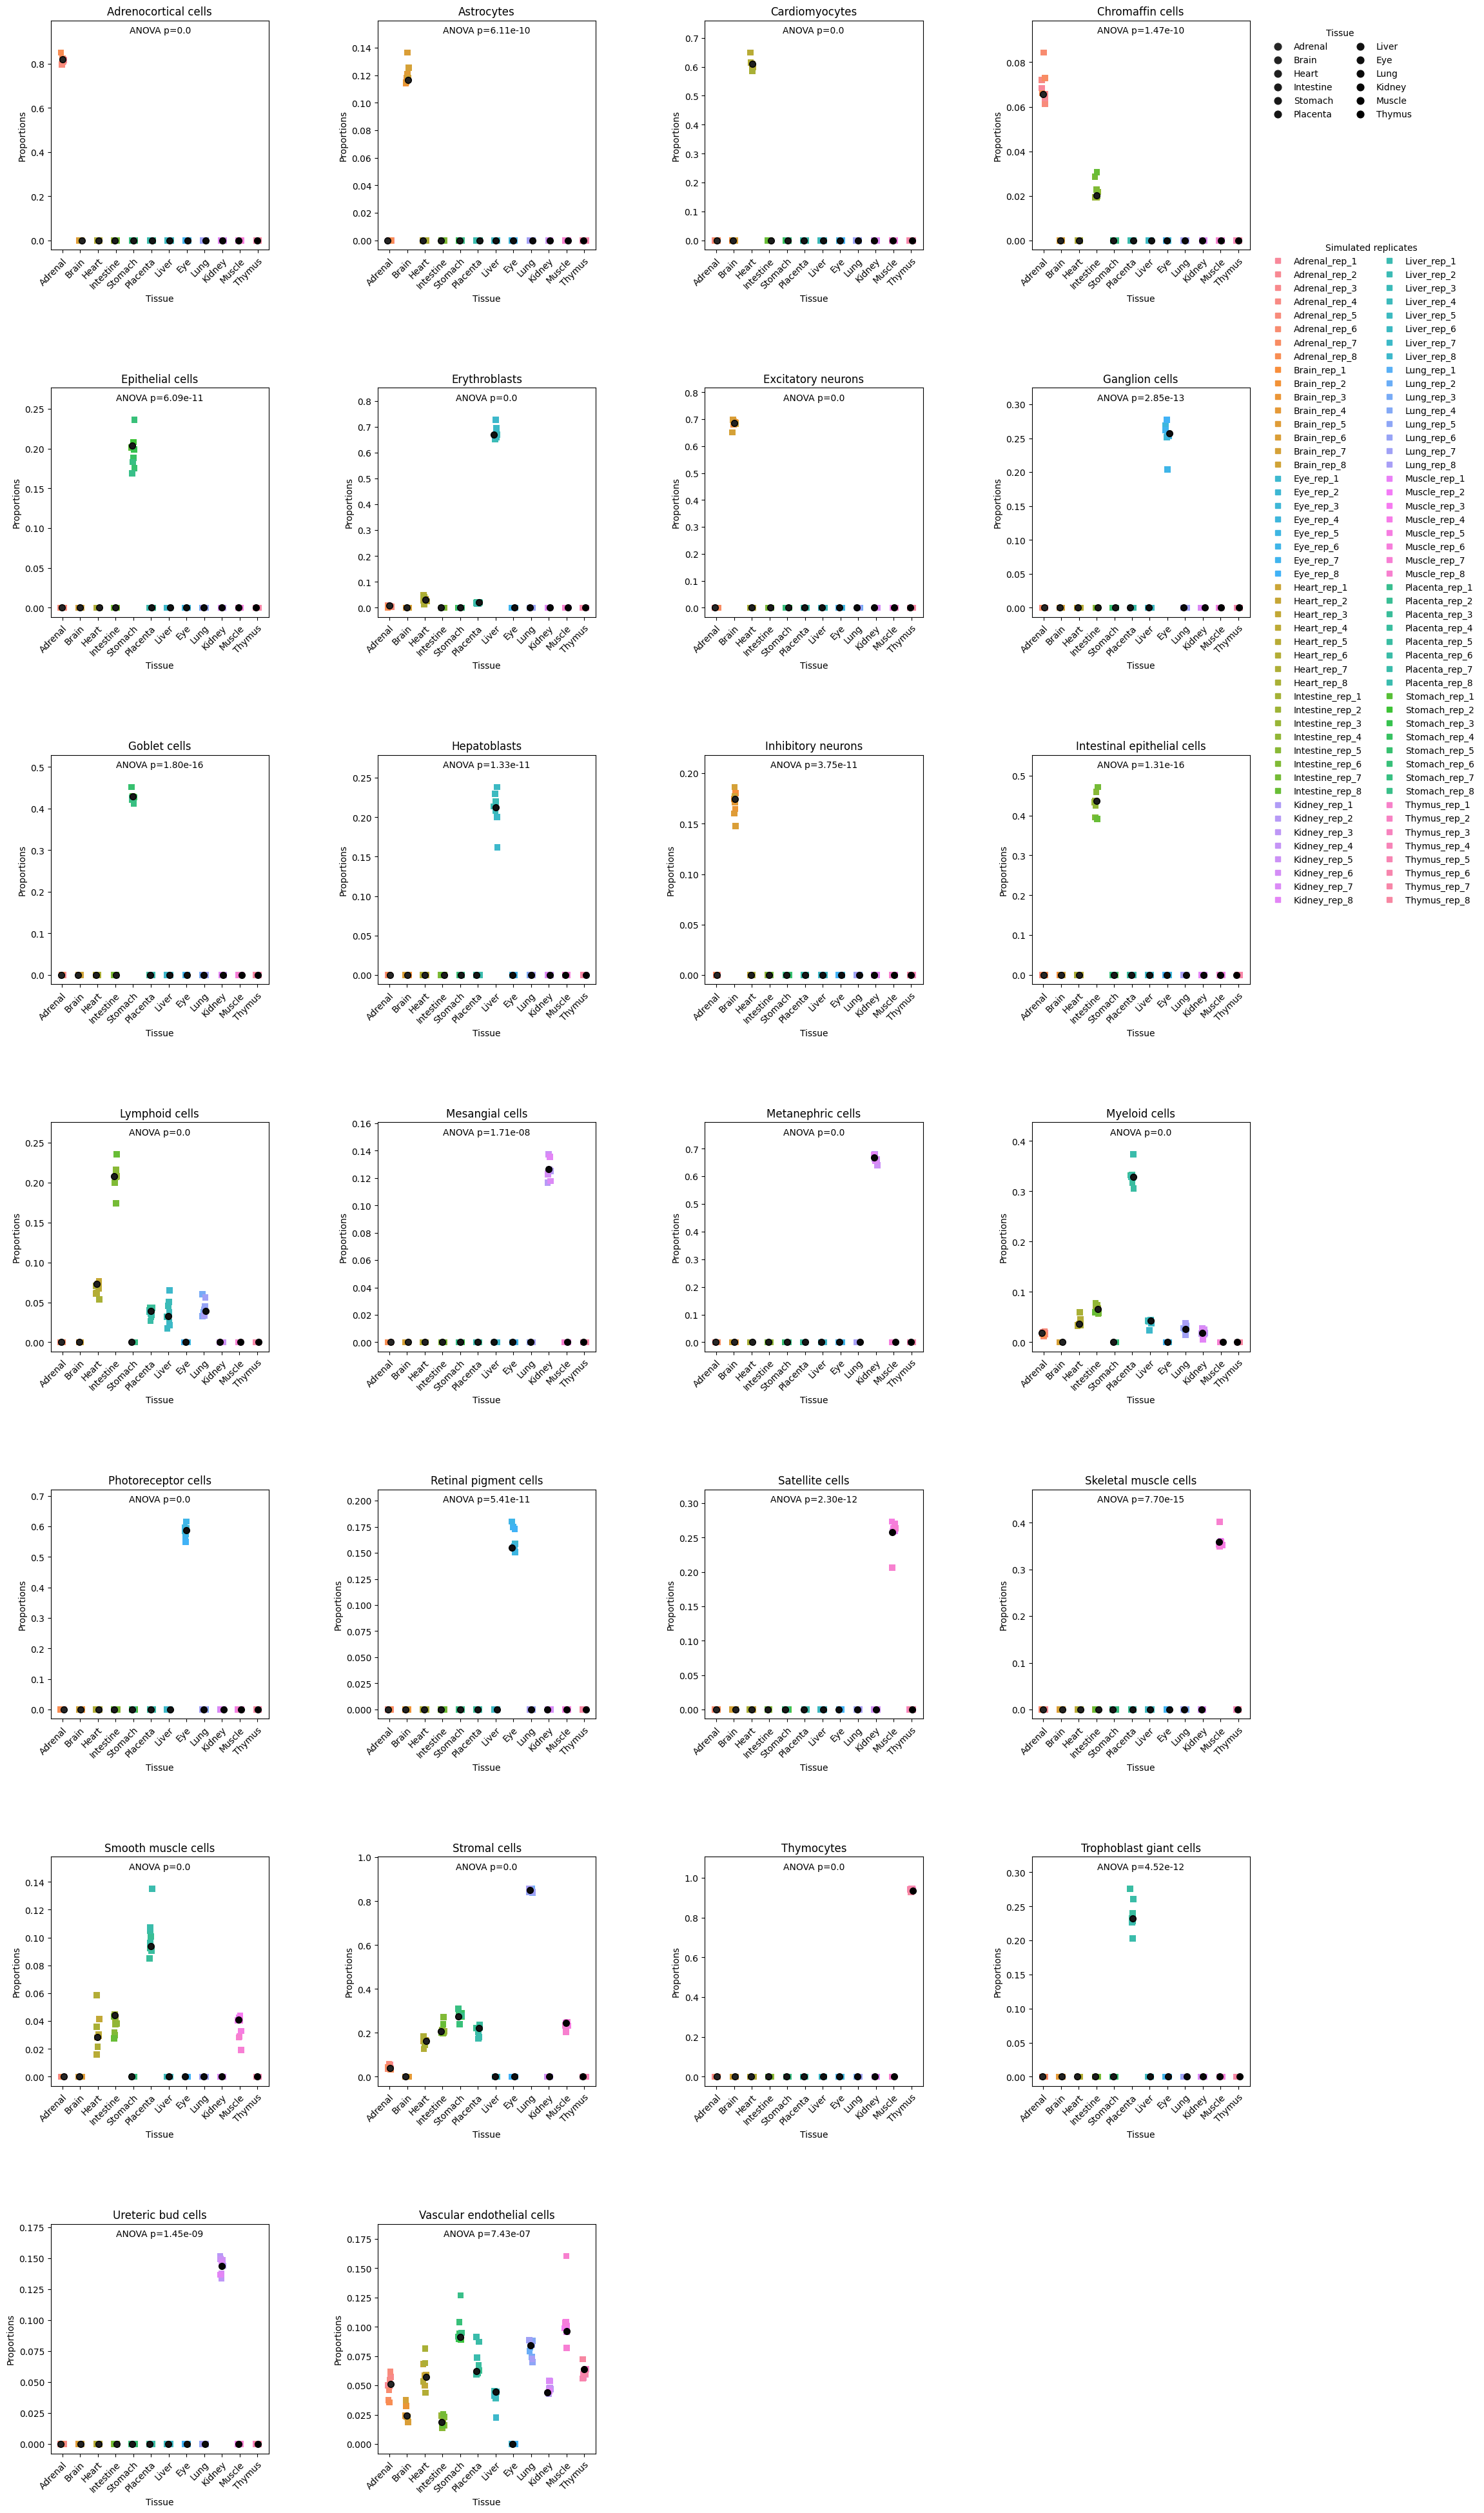

In [11]:
scanpro_out_norep.plot(n_columns=4, save=f"{FIG_PATH}/scatac_norep_all.pdf")

In [12]:
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep.tsv", sep="\t")

------------------------

## Specific comparisons

### Heart vs. muscle

#### With replicates

In [13]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Muscle"])
scanpro_out.results.to_csv("results/scatac_scanpro_rep_logit_heart-muscle.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [14]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Muscle"], transform="arcsin")
scanpro_out.results.to_csv("results/scatac_scanpro_rep_arcsin_heart-muscle.tsv", sep="\t")
scanpro_out.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Heart,mean_props_Muscle,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.069971,0.662907,0.000000,inf,14.235196,6.739920e-06,2.021976e-05
Erythroblasts,0.212123,0.023151,0.000000,inf,4.607451,3.541366e-03,6.374458e-03
Lymphoid cells,0.035767,0.047833,0.000000,inf,2.977475,2.432684e-02,3.127737e-02
Myeloid cells,0.040497,0.030123,0.000000,inf,6.833771,4.557875e-04,1.025522e-03
Satellite cells,0.008074,0.000000,0.258586,0.000000,-74.786129,3.028844e-10,2.725960e-09
Skeletal muscle cells,0.011216,0.000000,0.350192,0.000000,-24.910008,2.366455e-07,1.064905e-06
Smooth muscle cells,0.010909,0.030924,0.041806,0.739713,-1.345375,2.265100e-01,2.265100e-01
Stromal cells,0.129690,0.146847,0.249926,0.587562,-4.260494,5.161144e-03,7.741715e-03
Vascular endothelial cells,0.049483,0.058214,0.099489,0.585126,-2.497251,4.618564e-02,5.195885e-02


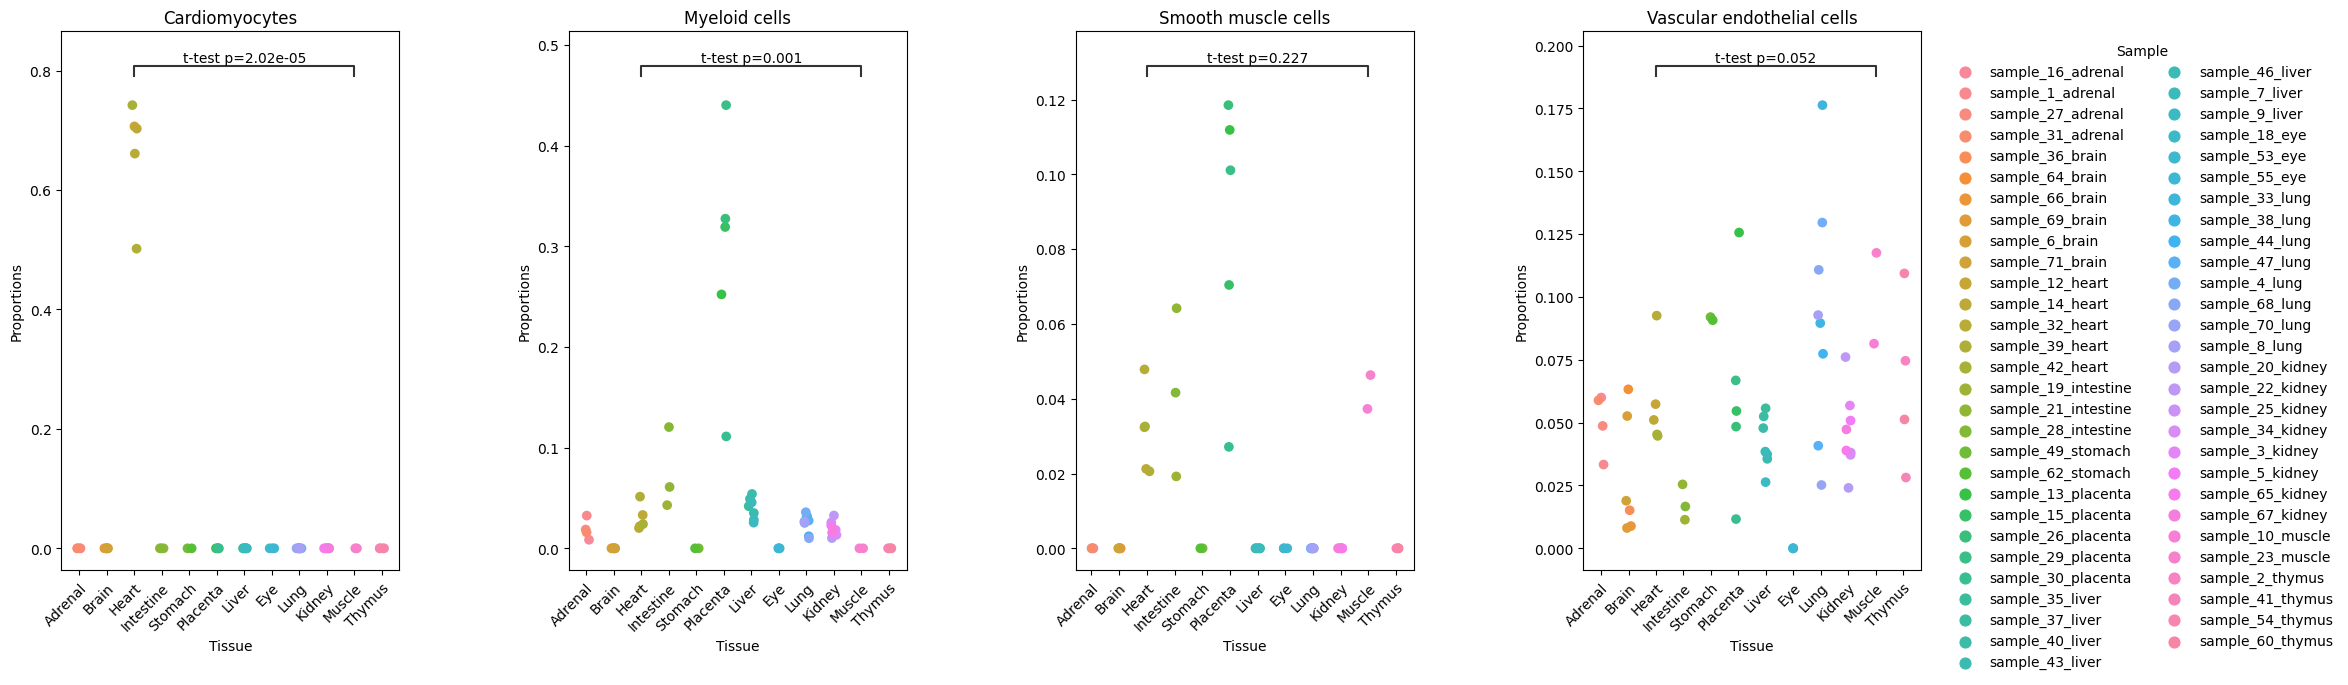

In [15]:
scanpro_out.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                 n_columns=4, save=f"{FIG_PATH}/scatac_rep_arcsin_heart-muscle.pdf")

#### Without replicates

In [16]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type', conds_col='Tissue',
                                    conditions=["Heart", "Muscle"], transform="logit")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_logit_heart-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 80.25 seconds


In [17]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type', conds_col='Tissue',
                                    conditions=["Heart", "Muscle"], transform="arcsin")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_arcsin_heart-muscle.tsv", sep="\t")
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 76.62 seconds


,baseline_props,mean_props_Heart,mean_props_Muscle,p_values
clusters,,,,
Cardiomyocytes,0.069971,0.625038,0.000000,3.077011e-11
Erythroblasts,0.212123,0.026020,0.000000,8.970672e-03
Lymphoid cells,0.035767,0.060999,0.000000,9.597618e-04
Myeloid cells,0.040497,0.030150,0.000000,3.806060e-03
Satellite cells,0.008074,0.000000,0.248588,2.924944e-06
Skeletal muscle cells,0.011216,0.000000,0.356469,5.163680e-08
Smooth muscle cells,0.010909,0.025053,0.033214,5.563187e-01
Stromal cells,0.129690,0.151181,0.233616,1.433902e-01
Vascular endothelial cells,0.049483,0.052650,0.091507,2.204815e-01


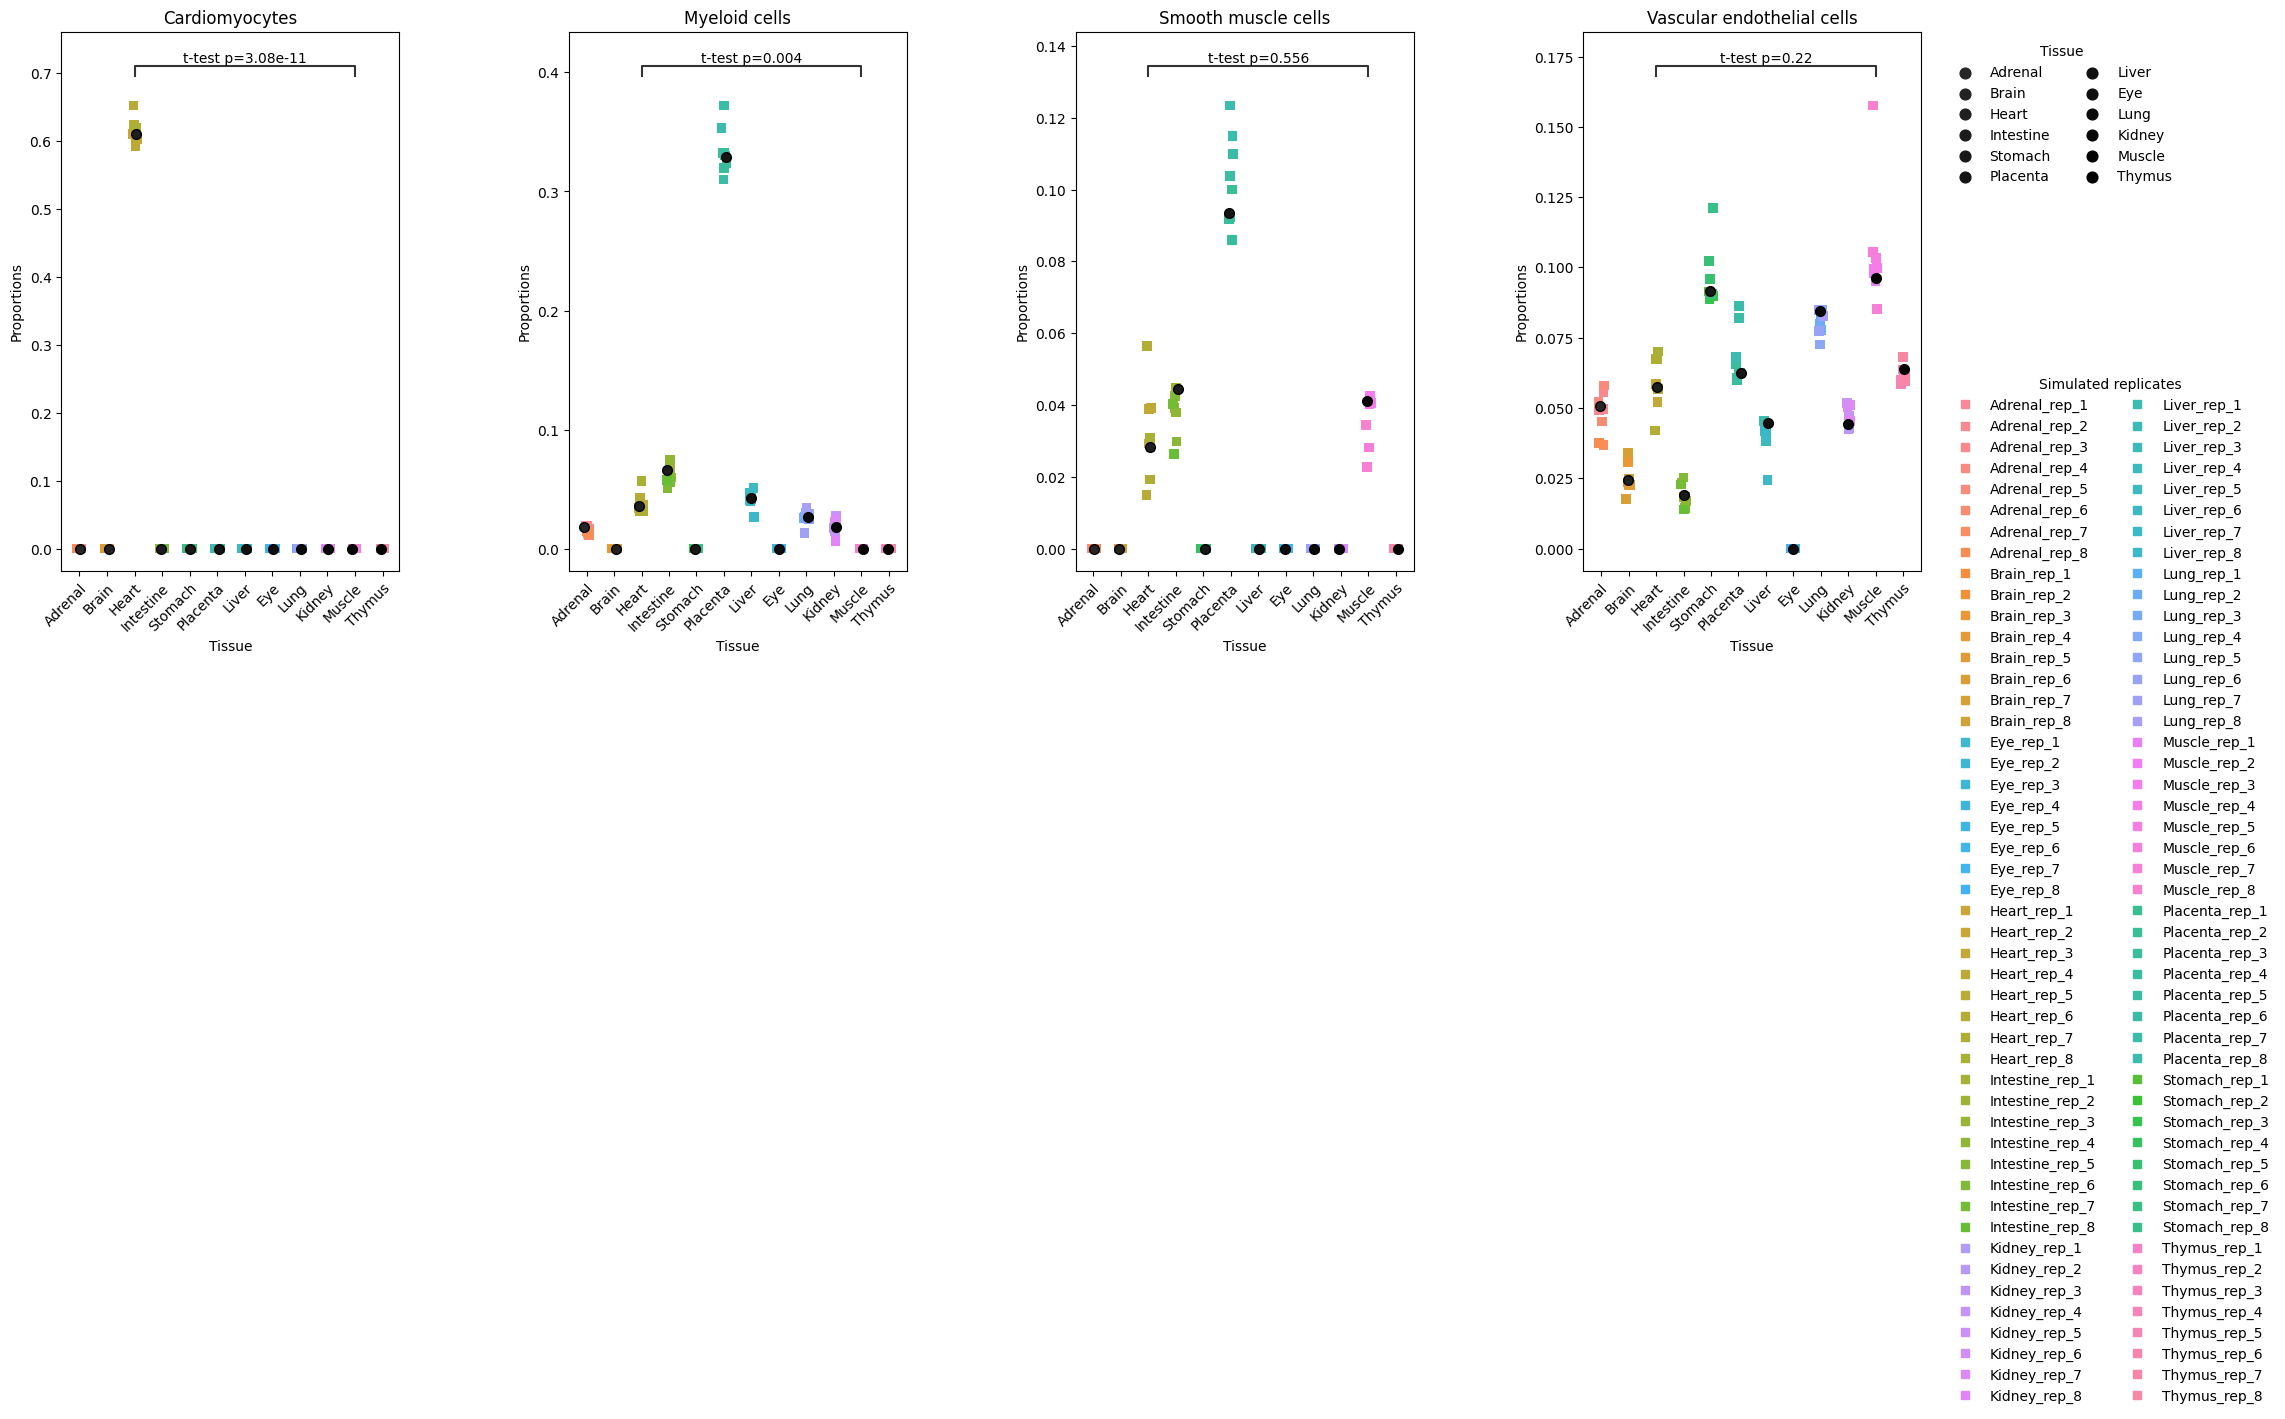

In [18]:
scanpro_out_norep.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                       n_columns=4, save=f"{FIG_PATH}/scatac_norep_arcsin_heart-muscle.pdf")

### Heart vs. intestine vs. muscle

#### With replicates

In [19]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Intestine", "Muscle"])
scanpro_out.results.to_csv("results/scatac_scanpro_rep_logit_heart-intestine-muscle.tsv", sep="\t")

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [20]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Intestine", "Muscle"], transform="arcsin")
scanpro_out.results.to_csv("results/scatac_scanpro_rep_arcsin_heart-intestine-muscle.tsv", sep="\t")
scanpro_out.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Heart,mean_props_Intestine,mean_props_Muscle,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.069971,0.662907,0.000000,0.000000,231.626990,0.000000e+00,0.000000e+00
Chromaffin cells,0.007953,0.000000,0.019419,0.000000,63.794973,0.000000e+00,0.000000e+00
Erythroblasts,0.212123,0.023151,0.000000,0.000000,23.989931,3.813339e-11,6.991121e-11
Intestinal epithelial cells,0.025494,0.000000,0.406002,0.000000,31.423270,2.253753e-14,4.958256e-14
Lymphoid cells,0.035767,0.047833,0.238626,0.000000,9.552509,7.102286e-05,8.680571e-05
Myeloid cells,0.040497,0.030123,0.074752,0.000000,20.682922,1.041169e-09,1.636123e-09
Satellite cells,0.008074,0.000000,0.000000,0.258586,3139.391623,0.000000e+00,0.000000e+00
Skeletal muscle cells,0.011216,0.000000,0.000000,0.350192,444.886869,0.000000e+00,0.000000e+00
Smooth muscle cells,0.010909,0.030924,0.041686,0.041806,0.672020,5.106762e-01,5.106762e-01


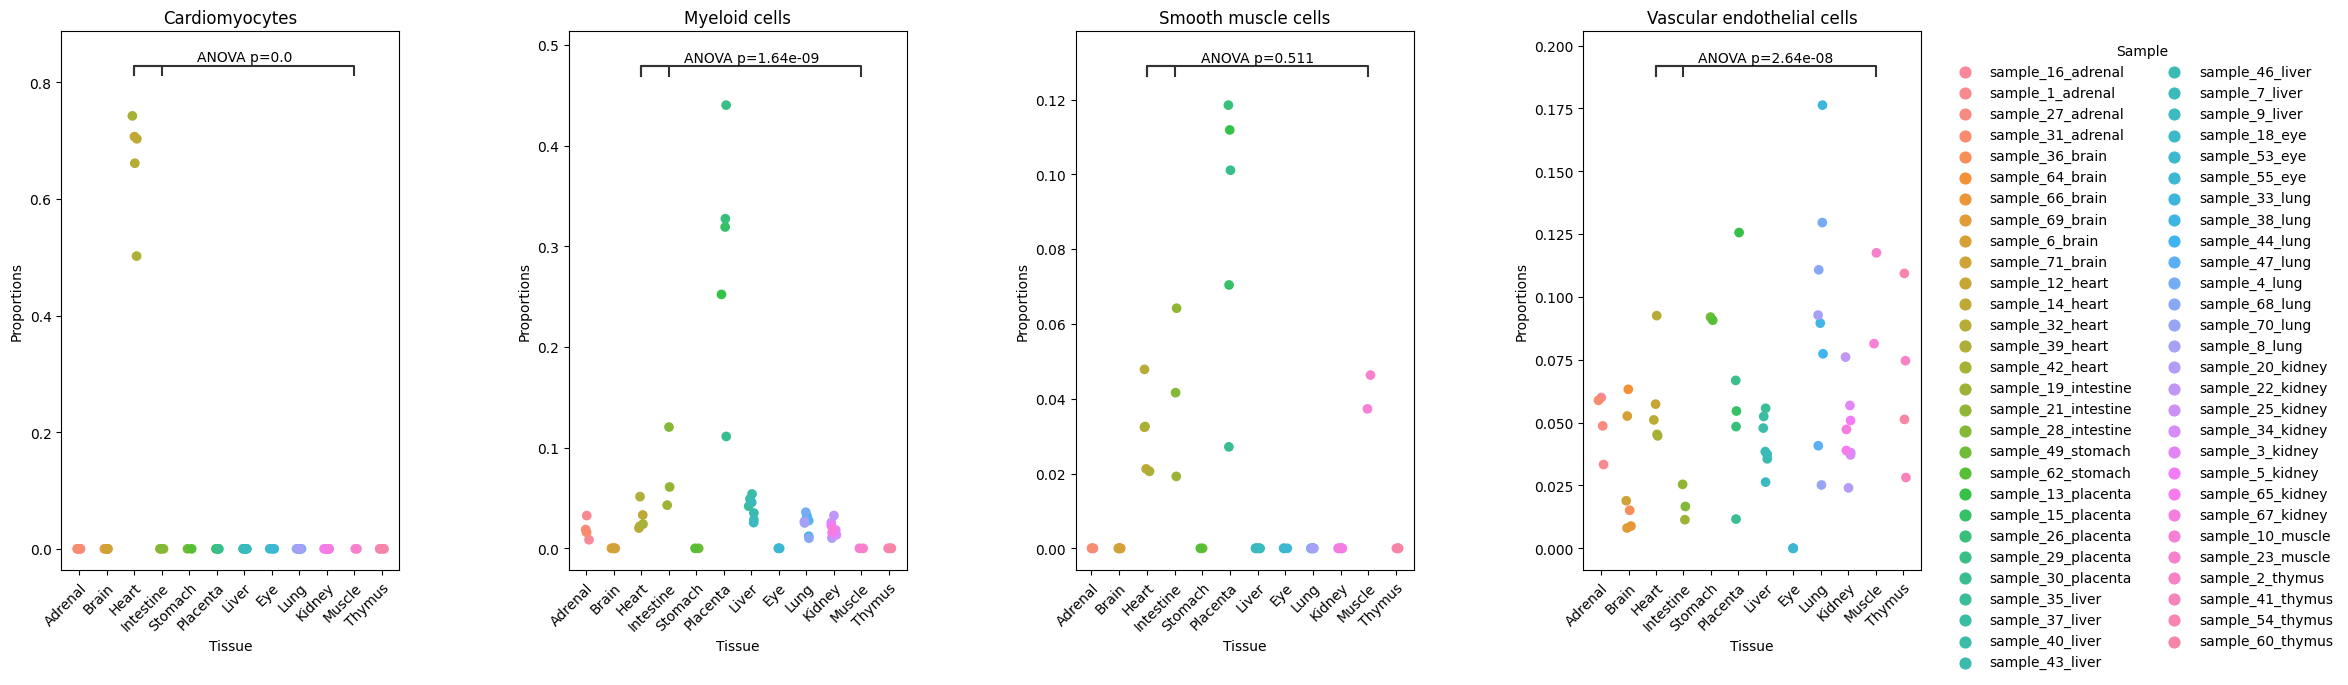

In [21]:
scanpro_out.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], n_columns=4,
                 save=f"{FIG_PATH}/scatac_rep_arcsin_heart-intestine-muscle.pdf")

#### No replicates

In [22]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue',
                              conditions=["Heart", "Intestine", "Muscle"])
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_logit_heart-intestine-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 79.5 seconds


In [23]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue',
                              conditions=["Heart", "Intestine", "Muscle"], transform="arcsin")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_arcsin_heart-intestine-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 77.96 seconds


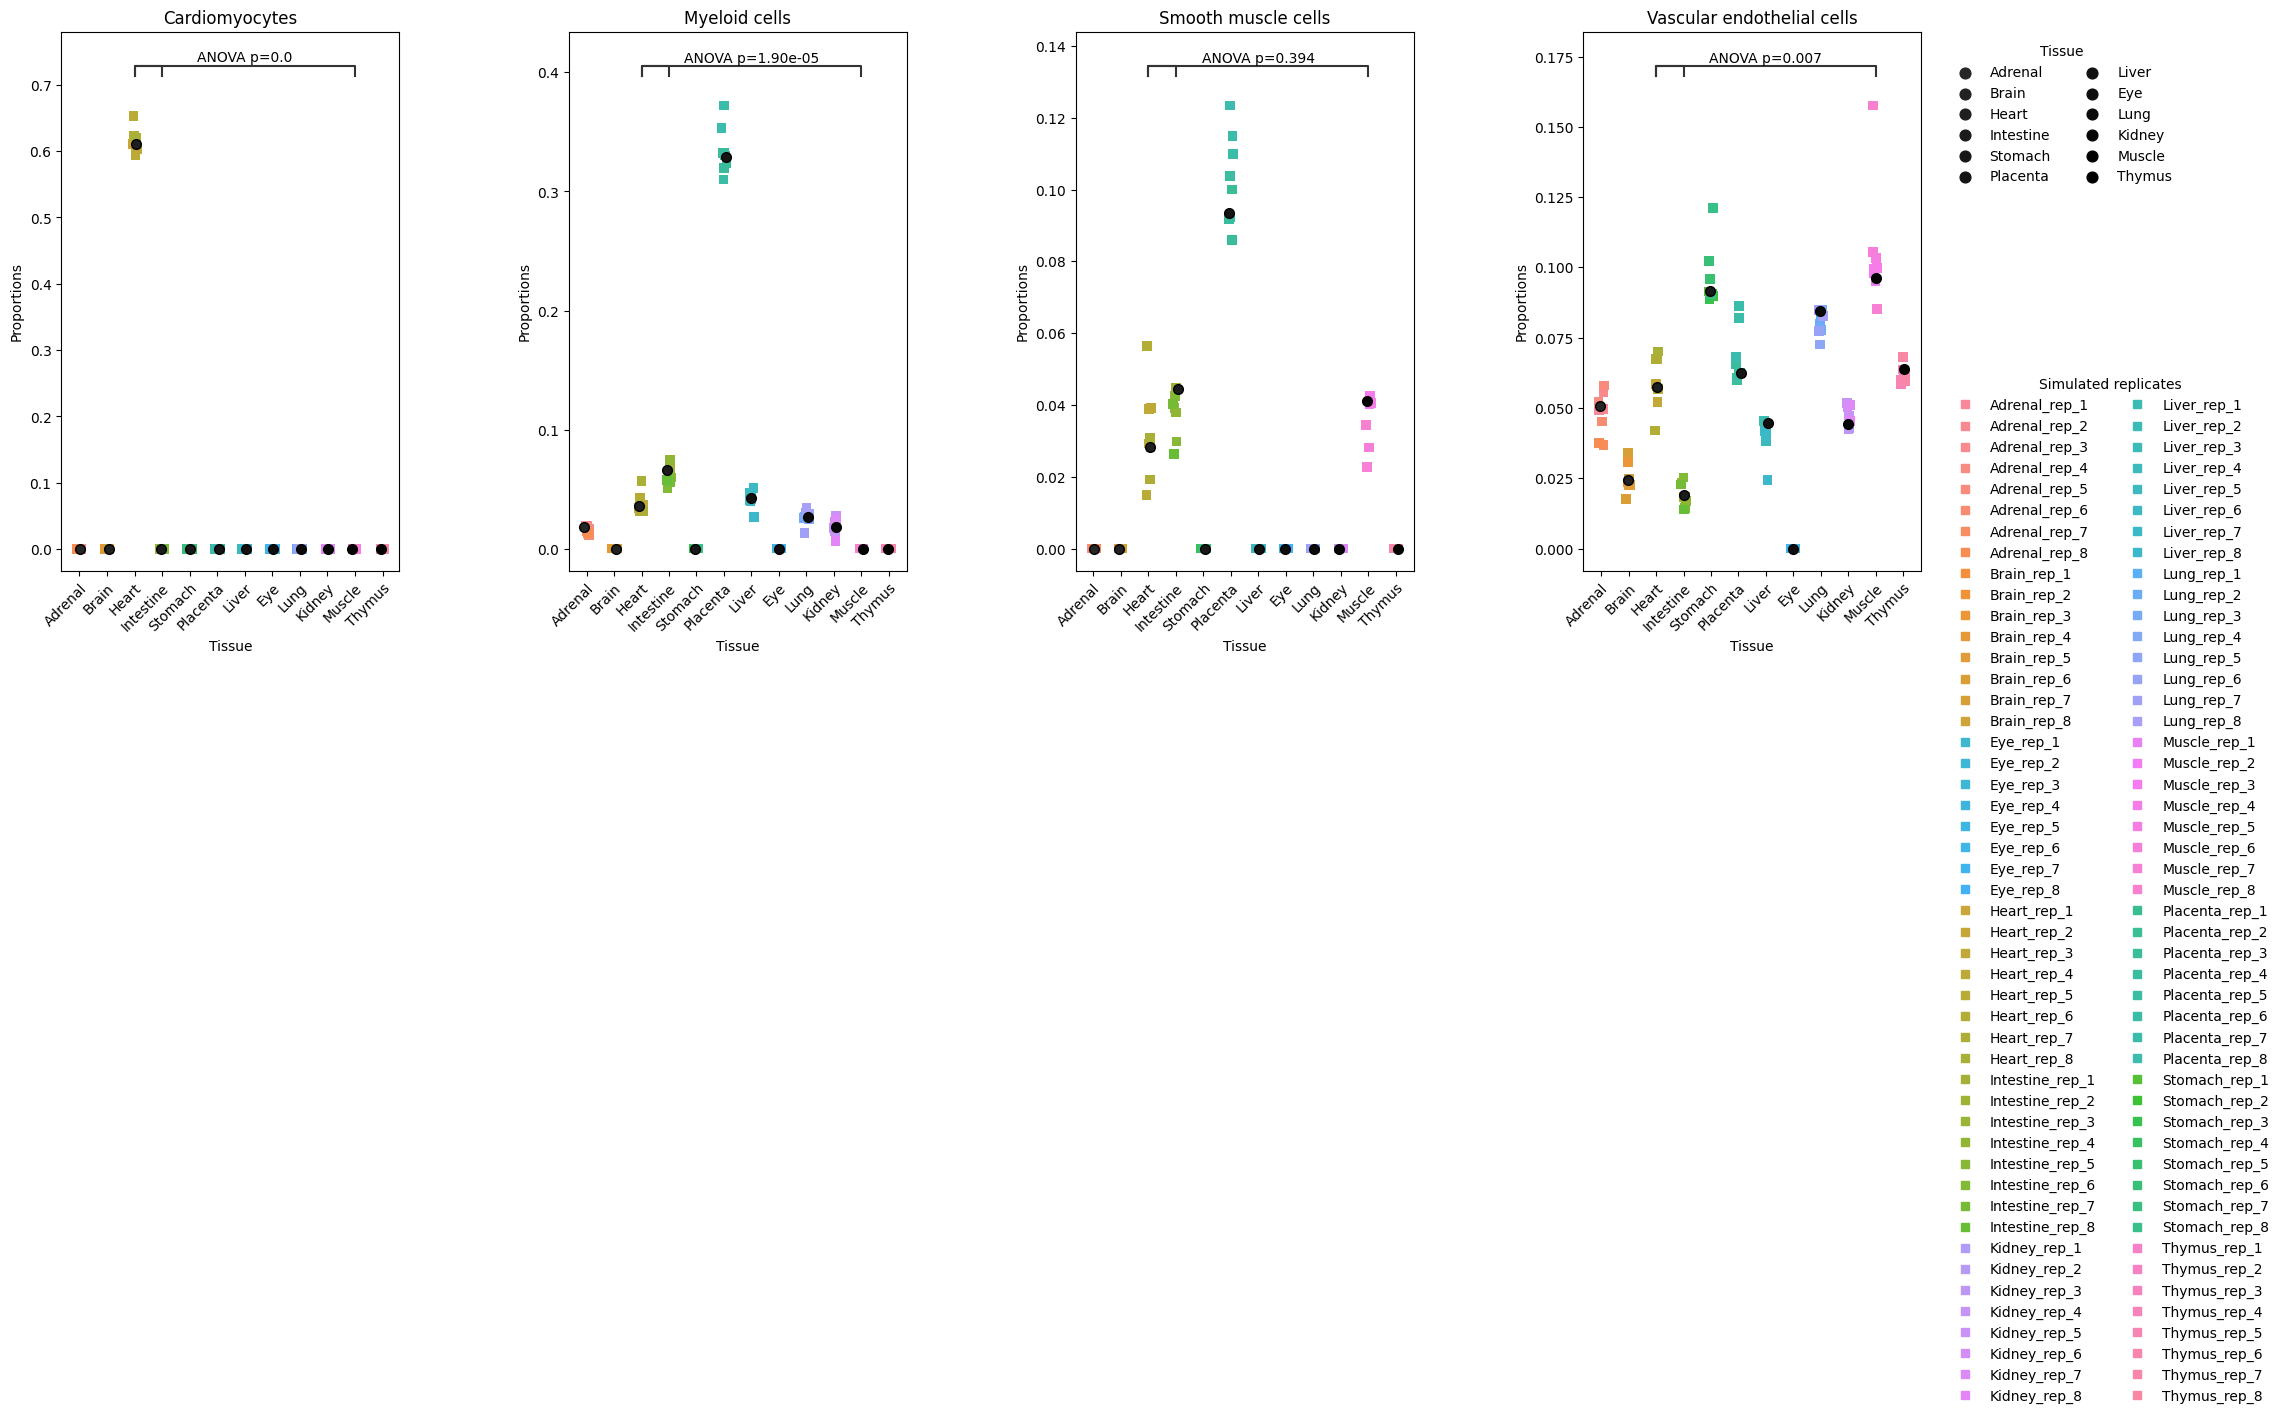

In [24]:
scanpro_out_norep.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                       n_columns=4, save=f"{FIG_PATH}/scatac_norep_arcsin_heart-intestine-muscle.pdf")

-----------

## Propeller

In [25]:
fetal_scatac_subset = fetal_scatac[fetal_scatac["Tissue"].isin(["Heart", "Muscle"])]

In [26]:
%%R -i fetal_scatac_subset -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

fetal_scatac = fetal_scatac_subset

propeller_results_logit = propeller(clusters = fetal_scatac$cell_type, sample = fetal_scatac$Sample, group = fetal_scatac$Tissue, transform="logit")
propeller_results_arcsin = propeller(clusters = fetal_scatac$cell_type, sample = fetal_scatac$Sample, group = fetal_scatac$Tissue, transform="arcsin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 
Performing logit transformation of proportions
group variable has 2 levels, t-tests will be performed
Error in getTransformedProps(clusters, sample, transform) : 
  object 'prop.trans' not found


RInterpreterError: Failed to parse and evaluate line 'library(speckle)\n\nfetal_scatac = fetal_scatac_subset\n\npropeller_results_logit = propeller(clusters = fetal_scatac$cell_type, sample = fetal_scatac$Sample, group = fetal_scatac$Tissue, transform="logit")\npropeller_results_arcsin = propeller(clusters = fetal_scatac$cell_type, sample = fetal_scatac$Sample, group = fetal_scatac$Tissue, transform="arcsin")\n'.
R error message: "Error in getTransformedProps(clusters, sample, transform) : \n  object 'prop.trans' not found"
R stdout:
The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 
Performing logit transformation of proportions
group variable has 2 levels, t-tests will be performed
Error in getTransformedProps(clusters, sample, transform) : 
  object 'prop.trans' not found

In [ ]:
propeller_results

In [ ]:
propeller_results_logit.to_csv("results/scatac_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/scatac_propeller_rep_arcsin.tsv", sep="\t")